In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("mnist_train_small.csv", header= None)
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19999,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Mnist - Digit recognition dataset
# Image is embedded inside the csv file
# 28*28 -> flattened -> fitting into a csv file

# 785 -> 1 column (output), 784 (image)
# pixel range - (0-255)
# 0 - black
# 255 - white

In [5]:
data.isnull().sum().any()


False

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 119.8 MB


In [7]:
# dividing features and targets

X = data.iloc[:, 1:].values
Y = data.iloc[:, 0].values

X.shape, Y.shape

((20000, 784), (20000,))

In [8]:
X.max()

255

In [9]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [10]:
X.shape

(20000, 784)

In [11]:
def PlotImage(X, Y):
    idx = np.random.choice(X.shape[0])
    label = Y[idx]
    print(" Target : ", label)
    x = X[idx, :]
    x = x.reshape(28,28)
    plt.imshow(x) 

 Target :  8


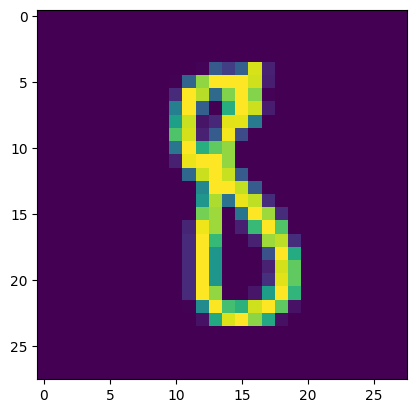

In [12]:
PlotImage(X,Y)

In [13]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=4)

print(" training Data shape : ", Xtrain.shape, Ytrain.shape)
print(" testing Data shape : ", Xtest.shape, Ytest.shape)

 training Data shape :  (16000, 784) (16000,)
 testing Data shape :  (4000, 784) (4000,)


In [14]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
%time model.fit(Xtrain, Ytrain)

CPU times: user 267 ms, sys: 114 ms, total: 381 ms
Wall time: 641 ms


GaussianNB()

In [15]:
%time predictions = model.predict(Xtest)

CPU times: user 284 ms, sys: 86.9 ms, total: 371 ms
Wall time: 548 ms


In [16]:

# model.score() -> regression - R2score
#----------------> classification - accuracy

model.score(Xtest, Ytest)

0.55425